У моделей линейной регрессии довольно много преимуществ. Во-первых, их легко обучать, процесс подбора коэффициентов довольно не сложная математическая операция и даже на больших данных такие модели обучаются довольно быстро. Их довольно легко интерпретировать (например, при единичном увеличении числа комментариев, которые человек написал на степике, вероятность его ухода с курса изменяется на столько-то). Но у линейных регрессионных моделей есть довольно большие недостатки и ограничения. Эти модели отлично себя показывают, когда мы решаем задачу классификации линейно разделимых классов (границу между точками можно провести с помощью прямой линии) или между нашими переменными существует строгая линейная взаимосвязь (в задачах предсказания). К тому же, должны выполняться ограничения: нормальное распределение остатков, гомоскедастичность, линейная зависимость переменных. Поэтому, когда мы решаем задачи более сложные, чем линейные зависимости, линейные модели показывают себя не очень здорово.

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data =  pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
    })

In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


Наша задача научиться (при помощи Дерева Решений) предсказывать значение переменной Y, основываясь на значениях переменных Х_1 и Х_2.

In [9]:
# классификатор - это некоторый объект, у которого есть методы
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [8]:
clf?

In [16]:
# Предобработка данных - сохраним все фичи в Х
X = data[['X_1', 'X_2']]
# Целевую переменную сохраним в y
y = data.Y

In [20]:
# Обучим наше Дерево Решений, для этого воспользуемся методом fit, передадим ему две переменные
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

##### Визуализировать дерево можно методом  plot_tree()

[Text(0.5, 0.8333333333333334, 'X_1 <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = Negative'),
 Text(0.25, 0.5, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Negative'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Negative'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Positive'),
 Text(0.75, 0.5, 'X_2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Positive'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Positive'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Negative')]

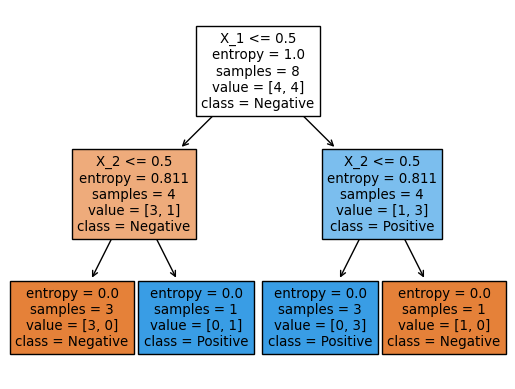

In [22]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True)